```python
$ pip install opencv-python
$ pip install cmake
$ pip install dlib
```

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

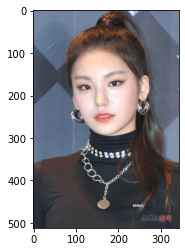

In [8]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/yeji.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # RGB로 바꿔주기
plt.show()
plt.imshow(img_rgb)
plt.show()

## Face Detection

In [9]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

In [10]:
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

rectangles[[(81, 133) (236, 288)]]


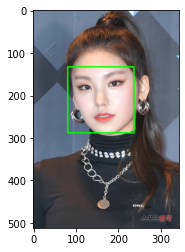

In [11]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Face Landmark

[Dlib ibug 300-W 데이터셋으로 학습한 pretrained model](https://ibug.doc.ic.ac.uk/resources/facial-point-annotations/)
```python
$ wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
$ mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models
$ cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2
```

In [12]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [13]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


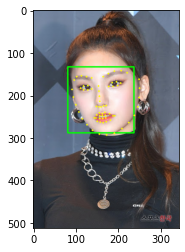

In [14]:
for landmark in list_landmarks:
    for idx, point in enumerate(landmark):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 스티커 입히기

![Face landmark](https://aiffelstaticprd.blob.core.windows.net/media/original_images/E-8-8.png)

In [214]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 턱(chin) 눈(eye) 입(mouth) 코(nose) :  2, 36, 48, 30 번 // 코 위치 이용
    x = landmark[30][0]
    y = landmark[30][1] 
    w = dlib_rect.width()
    h = dlib_rect.height()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(156, 214)
(x,y) : (156,214)
(w,h) : (156,156)


In [212]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(156, 156, 3)


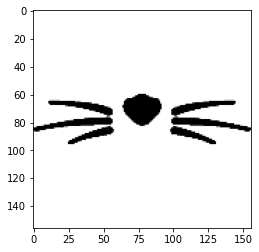

In [213]:
plt.imshow(img_sticker)
plt.show()

In [202]:
refined_x = x - w // 2  # left
refined_y = y - h // 2      # center
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (78,136)


In [203]:
print (img_sticker.shape)

(156, 156, 3)


In [204]:
img_test = img_test_saved.copy()

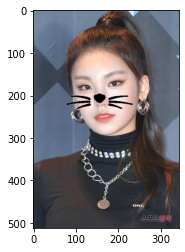

In [218]:
img_test_rgb =  cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
plt.imshow(img_test_rgb)
plt.show()

## 느낀점
- 스티커 하나 붙이는 데에도 어려움을 느꼈다. 스티커를 얼굴의 고개 각도에 따라 회전시키고 등의 변형을 자유롭게 하려면 어떻게 해야할지 고민이 필요하다.
- face detection과 face landmark 에 pre-trained model을 사용했지만, 실제로 face detection(grandient 이용), landmark(cnn 이용) 를 간단하게라도 만들어 볼 수 있으면 좋겠다.